# MLP Básica (Core)

## Descripción

En esta actividad, implementarás una red neuronal de perceptrón multicapa (MLP) básica utilizando el dataset «Breast Cancer Wisconsin (Diagnostic)» disponible en Kaggle. Este dataset es adecuado para la clasificación binaria, donde la red MLP predecirá si un tumor es benigno o maligno basado en una serie de características.

**Enlace al dataset**: [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

## Objetivo

El objetivo de la actividad es implementar una red MLP básica con una capa oculta, entrenarla en el dataset de cáncer de mama y evaluar su rendimiento en términos de precisión y otras métricas de clasificación.

## Instrucciones

### 1. Carga de datos
- Descarga y carga el dataset desde Kaggle. Observa las características disponibles, que incluyen variables como el radio del núcleo del tumor, la textura, la suavidad, entre otras.
- Asegúrate de verificar si hay valores nulos y manejar cualquier valor atípico que pudiera estar presente.

### 2. Exploración y preprocesamiento de datos
- Realiza una normalización de los datos para asegurar que todas las características se encuentren en el mismo rango y mejoren el rendimiento de la red neuronal.
- Divide el dataset en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba).

### 3. Implementación de la MLP
- Implementa una red MLP utilizando Keras o cualquier otra biblioteca de deep learning. La red debe incluir:
  - Una capa de entrada que coincida con el número de características del dataset.
  - Una capa oculta con al menos 32 neuronas y una función de activación ReLU.
  - Una capa de salida con una única neurona usando la función de activación sigmoide para la clasificación binaria.
- Utiliza la función de pérdida binaria (`binary_crossentropy`) y el optimizador Adam.

### 4. Entrenamiento del modelo
- Entrena la red en el conjunto de entrenamiento durante al menos 50 épocas. Asegúrate de monitorizar la pérdida y la precisión tanto en el conjunto de entrenamiento como en el conjunto de validación.
- Visualiza las curvas de aprendizaje que muestran cómo evolucionan la pérdida y la precisión durante el entrenamiento.

### 5. Evaluación del modelo
- Evalúa el modelo en el conjunto de prueba utilizando métricas como:
  - Precisión (accuracy)
  - Recall
  - F1-score
  - Matriz de confusión
- Discute si la red MLP básica es adecuada para este tipo de datos y cómo podría mejorarse.

## Conclusión

- Esta actividad tiene como objetivo principal el diseño y entrenamiento de una red MLP para la clasificación binaria de tumores. El análisis de los resultados permitirá determinar si una red básica es suficiente o si se requieren arquitecturas más complejas.


**Descripciones de las variables:**

- `id`: Identificador único para cada paciente.
- `age`: Edad del paciente en años.
- `origin`: Lugar de estudio.
- `sex`: Sexo (Masculino/Femenino).
- `cp`: Tipo de dolor de pecho ([angina típica, angina atípica, no anginal, asintomático]).
- `trestbps`: Presión arterial en reposo (en mm Hg al momento de la admisión en el hospital).
- `chol`: Colesterol sérico en mg/dl.
- `fbs`: Si el nivel de glucosa en sangre en ayunas es > 120 mg/dl.
- `restecg`: Resultados del electrocardiograma en reposo.  
  -- Valores: [normal, anomalía ST-T, hipertrofia ventricular izquierda].
- `thalach`: Frecuencia cardíaca máxima alcanzada.
- `exang`: Angina inducida por ejercicio (Verdadero/Falso).
- `oldpeak`: Depresión del segmento ST inducida por ejercicio en relación con el reposo.
- `slope`: Pendiente del segmento ST en el pico del ejercicio.
- `ca`: Número de vasos principales (0-3) coloreados por fluoroscopia.
- `thal`: [normal, defecto fijo, defecto reversible].
- `num`: Atributo predicho.

In [1424]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [1425]:
# 1. Carga de datos
dataset_url = r"C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\heart_disease_uci.csv"
df_train = pd.read_csv(dataset_url)

In [1426]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head()

Primeras filas del dataset:


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [1427]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


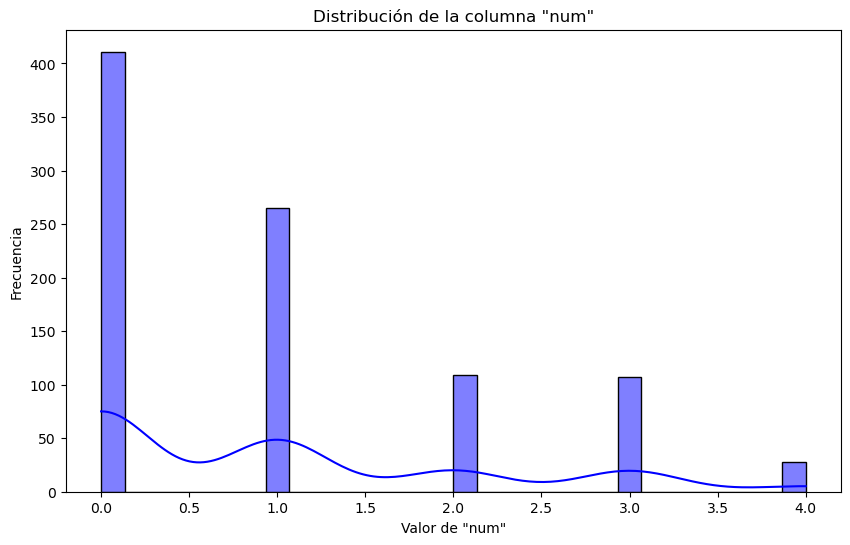

In [1428]:
# Visualización de la distribución de la columna 'num'
plt.figure(figsize=(10, 6))
sns.histplot(df_train['num'], kde=True, color='blue', bins=30)
plt.title('Distribución de la columna "num"')
plt.xlabel('Valor de "num"')
plt.ylabel('Frecuencia')
plt.show()

In [1429]:
# Eliminar la columna del id para evitar que el modelo se ajuste a ella y dataset porque no aporta al modelo
df_train = df_train.drop(columns=['id','dataset'])

In [1430]:
# Filtrar columnas numéricas
columnas_numericas = df_train.select_dtypes(include=['number']).columns

# Imprimir valores únicos en columnas numéricas
for columna in columnas_numericas:
    print(f"Valores únicos en {columna}: {df_train[columna].unique()}")
    print(" ")

Valores únicos en age: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 28 30 31 32 33 36 72
 73 75]
 
Valores únicos en trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.  98. 190.  nan 113.  92.  95.
  80. 185. 116.   0.  96. 127.]
 
Valores únicos en chol: [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183.

In [1431]:
# Filtrar columnas categóricas
columnas_categoricas = df_train.select_dtypes(include=['object']).columns

# Imprimir valores únicos en columnas categóricas
for columna in columnas_categoricas:
    print(f"Valores únicos en {columna}: {df_train[columna].unique()}")
    print(" ")

Valores únicos en sex: ['Male' 'Female']
 
Valores únicos en cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
 
Valores únicos en fbs: [True False nan]
 
Valores únicos en restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
 
Valores únicos en exang: [False True nan]
 
Valores únicos en slope: ['downsloping' 'flat' 'upsloping' nan]
 
Valores únicos en thal: ['fixed defect' 'normal' 'reversable defect' nan]
 


In [1432]:
diccionario_actualizado = {
    'age': 'int64',
    'sex': 'category',
    'cp': 'category',
    'trestbps': 'float64',
    'chol': 'float64',
    'fbs': 'boolean',
    'restecg': 'category',
    'thalch': 'float64',
    'exang': 'boolean',
    'oldpeak': 'float64',
    'slope': 'category',
    'ca': 'float64',
    'thal': 'category',
    'num': 'int64'
}

# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'category': 'category',
        'float64': 'float64',
        'int64': 'int64',
        'boolean': 'boolean',
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario_actualizado.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)


Diccionario Mapeado para pandas:
{'age': 'int64', 'sex': 'category', 'cp': 'category', 'trestbps': 'float64', 'chol': 'float64', 'fbs': 'boolean', 'restecg': 'category', 'thalch': 'float64', 'exang': 'boolean', 'oldpeak': 'float64', 'slope': 'category', 'ca': 'float64', 'thal': 'category', 'num': 'int64'}


In [1433]:
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Comparar los tipos de forma precisa, manejando equivalencias de tipos como 'string' y 'string[python]'
            if tipo_esperado.startswith('datetime') and tipo_actual.startswith('datetime'):
                continue  # Considerar igual si ambos son datetime
            elif tipo_esperado == 'boolean' and tipo_actual == 'bool':
                continue  # Considerar igual si el tipo es bool en pandas
            elif tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación con el diccionario mapeado actualizado
mismatches = validar_tipos(df_train, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Discrepancias encontradas en los tipos de datos:
- Columna 'sex': Tipo actual -> object, Tipo esperado -> category
- Columna 'cp': Tipo actual -> object, Tipo esperado -> category
- Columna 'fbs': Tipo actual -> object, Tipo esperado -> boolean
- Columna 'restecg': Tipo actual -> object, Tipo esperado -> category
- Columna 'exang': Tipo actual -> object, Tipo esperado -> boolean
- Columna 'slope': Tipo actual -> object, Tipo esperado -> category
- Columna 'thal': Tipo actual -> object, Tipo esperado -> category


In [1434]:
def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                if tipo == 'datetime64[ns]':
                    df[columna] = pd.to_datetime(df[columna], errors='coerce')
                else:
                    df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df


# Corregir los tipos de datos en df_train
df_train = corregir_tipos(df_train, diccionario_mapeado)

# Validar los tipos de datos después de la corrección
mismatches_post = validar_tipos(df_train, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Todos los tipos de datos han sido corregidos correctamente.


In [1435]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       920 non-null    int64   
 1   sex       920 non-null    category
 2   cp        920 non-null    category
 3   trestbps  861 non-null    float64 
 4   chol      890 non-null    float64 
 5   fbs       830 non-null    boolean 
 6   restecg   918 non-null    category
 7   thalch    865 non-null    float64 
 8   exang     865 non-null    boolean 
 9   oldpeak   858 non-null    float64 
 10  slope     611 non-null    category
 11  ca        309 non-null    float64 
 12  thal      434 non-null    category
 13  num       920 non-null    int64   
dtypes: boolean(2), category(5), float64(5), int64(2)
memory usage: 59.2 KB


In [1436]:
# Exploración y Preprocesamiento
# Manejo de valores nulos
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
ca,309,611,66.41
thal,434,486,52.83
slope,611,309,33.59
fbs,830,90,9.78
oldpeak,858,62,6.74
trestbps,861,59,6.41
thalch,865,55,5.98
exang,865,55,5.98
chol,890,30,3.26
restecg,918,2,0.22


In [1437]:
# Paso 1: Imputar valores nulos en columnas booleanas
df_train['fbs'] = df_train['fbs'].fillna(False)  # Asumimos que no tiene azúcar en ayunas elevado
df_train['exang'] = df_train['exang'].fillna(False)  # Asumimos que no tiene angina inducida por ejercicio

# Paso 2: Imputar valores nulos en columnas categóricas
df_train['sex'] = df_train['sex'].fillna(df_train['sex'].mode()[0])  # Moda de la columna
df_train['cp'] = df_train['cp'].fillna(df_train['cp'].mode()[0])  # Moda de la columna
df_train['restecg'] = df_train['restecg'].fillna(df_train['restecg'].mode()[0])  # Moda de la columna
df_train['slope'] = df_train['slope'].fillna(df_train['slope'].mode()[0])  # Moda de la columna
df_train['thal'] = df_train['thal'].fillna(df_train['thal'].mode()[0])  # Moda de la columna

# Paso 3: Imputar valores nulos en columnas numéricas con la mediana
df_train['trestbps'] = df_train['trestbps'].fillna(df_train['trestbps'].median())  # Mediana de la columna
df_train['chol'] = df_train['chol'].fillna(df_train['chol'].median())  # Mediana de la columna
df_train['thalch'] = df_train['thalch'].fillna(df_train['thalch'].median())  # Mediana de la columna
df_train['oldpeak'] = df_train['oldpeak'].fillna(df_train['oldpeak'].median())  # Mediana de la columna
df_train['ca'] = df_train['ca'].fillna(df_train['ca'].median())  # Mediana de la columna

# Verificar los resultados después de imputar
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)


,datos sin NAs en q,Na en q,Na en %
age,920,0,0.0
sex,920,0,0.0
cp,920,0,0.0
trestbps,920,0,0.0
chol,920,0,0.0
fbs,920,0,0.0
restecg,920,0,0.0
thalch,920,0,0.0
exang,920,0,0.0
oldpeak,920,0,0.0


In [1438]:
# Identificar duplicados
duplicados_train = df_train.duplicated()

# Obtener cantidad de duplicados
total_dup_train = duplicados_train.sum()

print(f"Total de registros duplicados en train: {total_dup_train}")

Total de registros duplicados en train: 2


In [1439]:
# Eliminar registros duplicados
df_train = df_train.drop_duplicates()

# Verificar nuevamente si existen duplicados
duplicados_train_post = df_train.duplicated().sum()
print(f"Total de registros duplicados después de eliminar: {duplicados_train_post}")

Total de registros duplicados después de eliminar: 0


In [1440]:
# Mapeo de valores en la columna 'sex'
df_train['sex'] = df_train['sex'].map({'Male': 1, 'Female': 0})

# Verificación
df_train['sex'].head()


0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: category
Categories (2, int64): [0, 1]

In [1441]:
# Estadísticas descriptivas
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.00,77.0
trestbps,918.0,132.000000,18.447544,0.0,120.00,130.0,140.00,200.0
chol,918.0,199.862745,109.154522,0.0,177.25,223.0,267.00,603.0
thalch,918.0,137.689542,25.153455,60.0,120.00,140.0,155.75,202.0
oldpeak,918.0,0.855120,1.058450,-2.6,0.00,0.5,1.50,6.2
ca,918.0,0.227669,0.629532,0.0,0.00,0.0,0.00,3.0
num,918.0,0.995643,1.142985,0.0,0.00,1.0,2.00,4.0


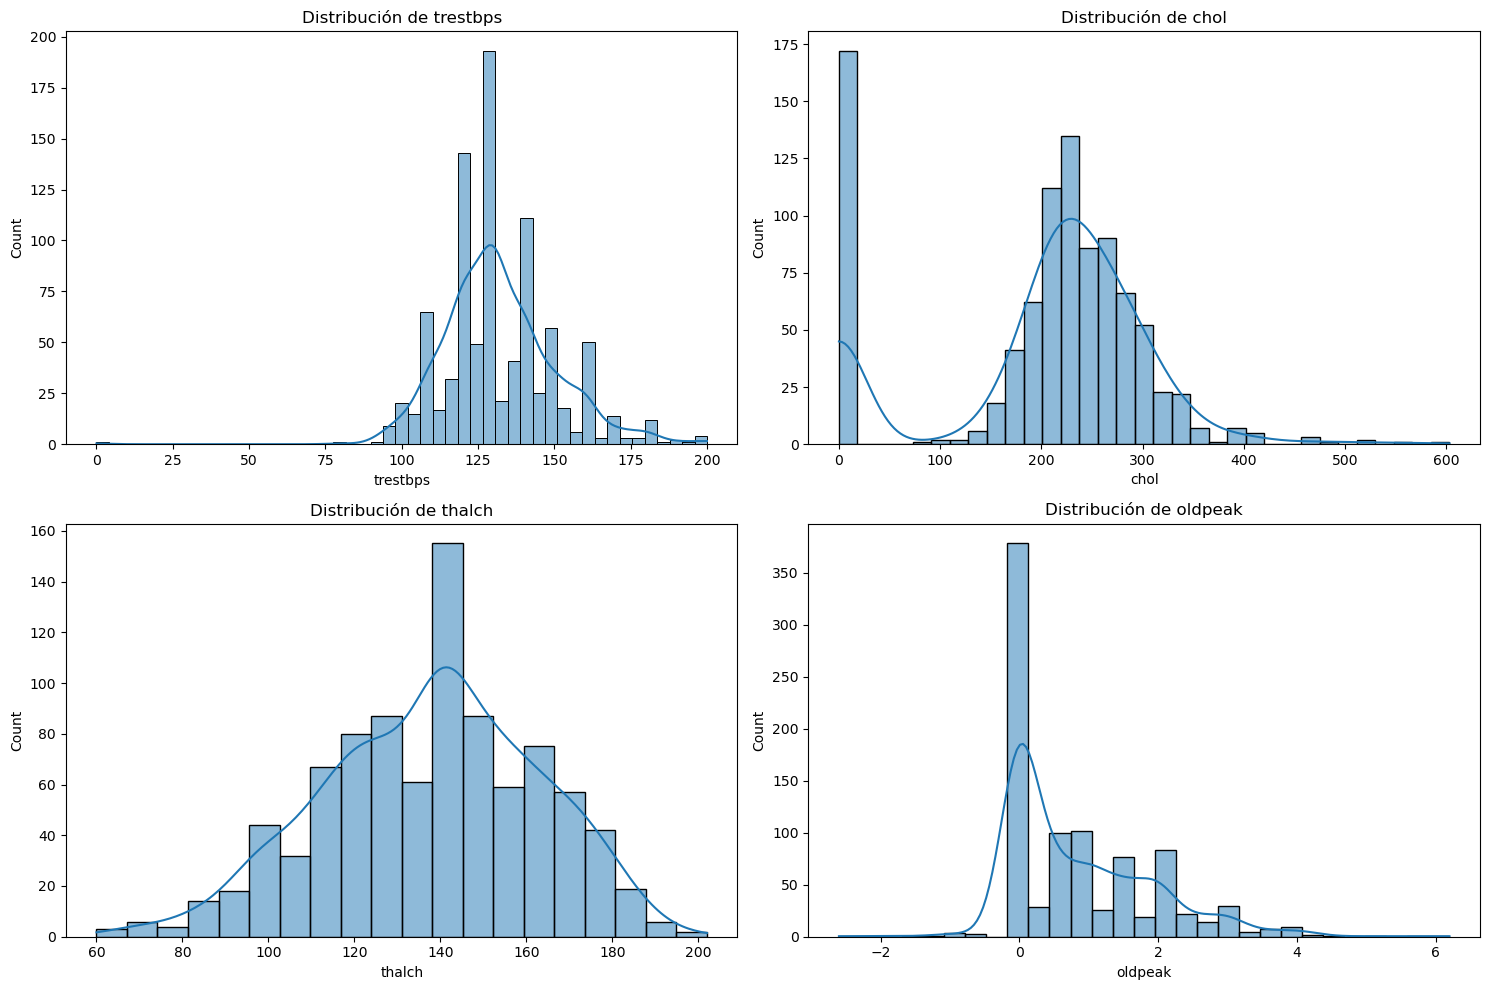

In [1442]:
# Lista de columnas a graficar
columns = ['trestbps', 'chol', 'thalch', 'oldpeak']

# Crear figura y ejes con subgráficos en 2 filas y 3 columnas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # Ajustar el tamaño según lo necesario
axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente

# Generar gráficos para cada columna
for i, col in enumerate(columns):
    sns.histplot(df_train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

# Ocultar subgráficos adicionales si hay menos columnas que espacios
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Ajustar el diseño
plt.show()


In [1443]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       918 non-null    int64   
 1   sex       918 non-null    category
 2   cp        918 non-null    category
 3   trestbps  918 non-null    float64 
 4   chol      918 non-null    float64 
 5   fbs       918 non-null    boolean 
 6   restecg   918 non-null    category
 7   thalch    918 non-null    float64 
 8   exang     918 non-null    boolean 
 9   oldpeak   918 non-null    float64 
 10  slope     918 non-null    category
 11  ca        918 non-null    float64 
 12  thal      918 non-null    category
 13  num       918 non-null    int64   
dtypes: boolean(2), category(5), float64(5), int64(2)
memory usage: 66.2 KB


In [1444]:
# Filtrar columnas categóricas
columnas_categoricas = df_train.select_dtypes(include=['category']).columns

# Imprimir valores únicos en columnas categóricas
for columna in columnas_categoricas:
    print(f"Valores únicos en {columna}: {df_train[columna].unique()}")
    print(" ")

Valores únicos en sex: [1, 0]
Categories (2, int64): [0, 1]
 
Valores únicos en cp: ['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina']
Categories (4, object): ['asymptomatic', 'atypical angina', 'non-anginal', 'typical angina']
 
Valores únicos en restecg: ['lv hypertrophy', 'normal', 'st-t abnormality']
Categories (3, object): ['lv hypertrophy', 'normal', 'st-t abnormality']
 
Valores únicos en slope: ['downsloping', 'flat', 'upsloping']
Categories (3, object): ['downsloping', 'flat', 'upsloping']
 
Valores únicos en thal: ['fixed defect', 'normal', 'reversable defect']
Categories (3, object): ['fixed defect', 'normal', 'reversable defect']
 


In [1445]:
# Convertir las variables booleanas a 0 y 1
df_train['fbs'] = df_train['fbs'].astype(int)
df_train['exang'] = df_train['exang'].astype(int)

# Inicializar el LabelEncoder
le = LabelEncoder()

# Codificar las columnas categóricas ordinales
df_train['cp'] = le.fit_transform(df_train['cp'])
df_train['restecg'] = le.fit_transform(df_train['restecg'])
df_train['slope'] = le.fit_transform(df_train['slope'])
df_train['thal'] = le.fit_transform(df_train['thal'])

# Codificar la columna sex (que es una variable binaria)
df_train['sex'] = le.fit_transform(df_train['sex'])

# Inicializar el escalador
scaler = StandardScaler()

# Aplicar la transformación a las columnas numéricas
numeric_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']  # Añade todas las numéricas
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

# Verificar las primeras filas después de la codificación y estandardización
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.006537,1,3,0.705085,0.303747,1,0,0.489681,0,1.365834,0,-0.361845,0,0
1,1.430829,1,0,1.518645,0.789562,0,0,-1.180980,1,0.609600,1,4.406195,1,2
2,1.430829,1,0,-0.650848,0.267081,0,0,-0.345649,1,1.649422,1,2.816848,2,1
3,-1.751359,1,2,-0.108475,0.459574,0,1,1.961454,0,2.500185,0,-0.361845,1,0
4,-1.327067,0,1,-0.108475,0.037923,0,0,1.364789,0,0.515071,2,-0.361845,1,0


Epoch 1/100


c:\Users\GIGABYTE\anaconda3\envs\deepL\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2568 - loss: 3.1131 - val_accuracy: 0.5374 - val_loss: 2.8791
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3092 - loss: 2.8882 - val_accuracy: 0.6054 - val_loss: 2.7512
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3646 - loss: 2.7698 - val_accuracy: 0.5578 - val_loss: 2.6040
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3475 - loss: 2.7774 - val_accuracy: 0.5714 - val_loss: 2.4748
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4157 - loss: 2.6024 - val_accuracy: 0.5850 - val_loss: 2.3580
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4445 - loss: 2.4241 - val_accuracy: 0.5646 - val_loss: 2.2440
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4530 - loss: 2.4024 - val_accuracy: 0.5714 - val_loss: 2.1689
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4775 - loss: 2.2991 - val_accuracy: 0.5782 - val_loss: 2.

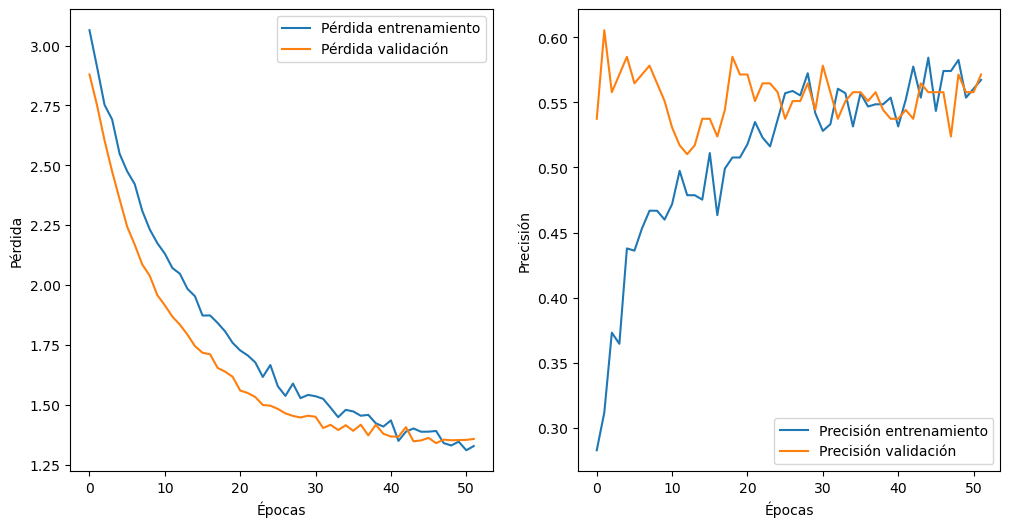

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
              precision    recall  f1-score   support

           0       0.75      0.78      0.77        73
           1       0.60      0.39      0.47        62
           2       0.19      0.23      0.21        22
           3       0.23      0.27      0.25        22
           4       0.06      0.20      0.10         5

    accuracy                           0.51       184
   macro avg       0.37      0.37      0.36       184
weighted avg       0.55      0.51      0.52       184

[[57  9  4  3  0]
 [16 24  9 11  2]
 [ 3  4  5  5  5]
 [ 0  2  6  6  8]
 [ 0  1  2  1  1]]


In [1446]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Separar características y variable objetivo
X = df_train.drop('num', axis=1)
y = df_train['num']

# Convertir las etiquetas en formato one-hot encoding para multiclase
y_one_hot = to_categorical(y)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

# Obtener las etiquetas originales (no one-hot) para calcular los pesos
y_train_classes = np.argmax(y_train, axis=1)  # Cambiar a y_train, que es one-hot codificado

# Calcular los pesos de las clases
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_classes), y=y_train_classes)

# Convertir los pesos a un diccionario
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

# Crear el modelo MLP con dropout y regularización L2
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.4))  # Aumentar la tasa de dropout
model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.4))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Cambiar a softmax para multiclase

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo con class_weight
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], class_weight=class_weight_dict)

# Visualizar curvas de aprendizaje (precisión y pérdida)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

# Evaluación del modelo
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convertir las predicciones de probabilidad a clases

# Convertir las etiquetas de prueba a clases (no one-hot)
y_test_classes = y_test.argmax(axis=1)

# Métricas de rendimiento
print(classification_report(y_test_classes, y_pred))
print(confusion_matrix(y_test_classes, y_pred))


## Análisis de Métricas del Modelo

### **1. Precisión (Precision)**:
- Para la clase 0, la precisión es bastante buena (0.75), lo que significa que cuando el modelo predice la clase 0, está en lo correcto el 75% de las veces.
- Para las clases 1, 2, 3 y 4, la precisión es más baja, especialmente para la clase 4, donde es solo 0.06. Esto significa que el modelo tiene una alta tasa de falsos positivos para estas clases.

### **2. Recuerdo (Recall)**:
- El recuerdo para la clase 0 es alto (0.78), lo que indica que el modelo está capturando bien los ejemplos de esta clase.
- Sin embargo, el recuerdo es bajo para las clases 1, 2, 3 y 4, especialmente para la clase 1 (0.39) y la clase 4 (0.20). Esto indica que el modelo tiene dificultades para identificar correctamente los ejemplos de estas clases, probablemente debido a un desequilibrio en las clases, ya que la clase 4 tiene solo 5 ejemplos.

### **3. Puntuación F1 (F1-score)**:
- El F1-score combina precisión y recuerdo en una sola métrica y proporciona un buen indicador del rendimiento general del modelo.
- Para la clase 0, el F1-score es 0.77, lo que es un buen resultado. 
- Para las clases 1, 2, 3 y 4, el F1-score es bajo, especialmente para la clase 4 (0.10), lo que refleja tanto la baja precisión como el bajo recuerdo.

### **4. Exactitud (Accuracy)**:
- La exactitud global es de 0.51, lo que significa que el modelo está acertando el 51% de las predicciones en general. Este es un rendimiento moderado, pero no es ideal, especialmente considerando que las clases con menos datos están afectando el rendimiento general del modelo.

### **5. Promedios Macro y Ponderados**:
- **Macro promedio**: La precisión, el recuerdo y el F1-score promedio macro son bastante bajos (alrededor de 0.36 a 0.37). Esto indica que el modelo está teniendo dificultades en general con las clases menos representadas.
- **Promedio ponderado**: Los promedios ponderados (que tienen en cuenta la frecuencia de las clases) son más altos (alrededor de 0.51 a 0.55), lo que significa que el modelo está funcionando mejor en las clases con más ejemplos, como la clase 0.

### **6. Matriz de Confusión**:
- En la matriz de confusión, se observa que la clase 0 está siendo bien clasificada (con muchos aciertos en la diagonal), mientras que las otras clases están siendo muy mal clasificadas.
- La clase 4, con solo 5 ejemplos, está siendo casi completamente mal clasificada. Esto es un claro indicio de que el modelo tiene dificultades con clases menos representadas, lo cual es común en problemas con desequilibrio de clases.

---

## **Conclusiones:**
- El modelo tiene un rendimiento aceptable para la clase 0 (con una precisión y recall decentes), pero no está logrando un buen desempeño en las otras clases, especialmente en aquellas con pocos ejemplos.
- **Desbalance de clases**: Las clases con menos ejemplos (en particular la clase 4) están afectando seriamente el rendimiento general del modelo. El modelo tiene dificultad para identificar correctamente estas clases debido al número limitado de ejemplos.
- **Sugerencias de mejora**:
   - **Revisar el balance de clases**: Intentar aplicar técnicas de sobremuestreo (como SMOTE) para aumentar las muestras de las clases minoritarias o submuestreo de las clases mayoritarias podría ayudar.
   - **Optimización de pesos de clase**: Podrías ajustar más los pesos de clase para darle más importancia a las clases con pocos ejemplos.
   - **Ajustes en la arquitectura del modelo**: Experimentar con una arquitectura más compleja o probar diferentes funciones de activación y optimizadores.
   - **Aumento de datos**: Si es posible, conseguir más datos para las clases minoritarias sería ideal.
